<div style="text-align: center"> Gold Price Explotaration</div>

![g.jpg](g.jpg)

<div style="text-align: center">Done by Group 2 </div>

| No | Name         | Student id  |
|:--:|:-------------|:-----------:|
| 1. | Chia Xiu Xiang | AIT2204140 |
| 2. | Heng Kee Liang | AIT2109941 |



<a id = "Table_of_content"></a>
# Table of content
### 1. [Introduction](#Introduction)
### 2. [Data Preparation](#Data_Preparation)
#### &emsp;► [Data Preprocessing](#Data_Preparation1)
#### &emsp;► [NaN Values Checking](#Data_Preparation2)
#### &emsp;► [NaN Values Processing](#Data_Preparation3)
### 3. [Exploratory Data Analysis](#EDA)
#### &emsp;► [Close over Time](#EDA1)
#### &emsp;► [Quaterly Plotting](#EDA2)
#### &emsp;► [Box Plot](#EDA3)
#### &emsp;► [Scatterplot](#EDA4)
#### &emsp;► [Heatmap](#EDA5)
### 4. [Inferential Testing](#Inferential_Testing)
#### &emsp;► [t-test](#Inferential_Testing1)
### 5. [Factor Analysis](#FA)
#### &emsp;► [Exploratory Factor Analysis](#FA1)
### 6. [Conclusion](#Conclusion)

# Introduction
Gold has been a symbol of wealth for several thousands of years. Gold has always played an important role in the international monetary system. Gold coins were first struck on the order of King Croesus of Lydia (an area that is now part of Turkey), around 550 BC(Gold as Currency | World Gold Council, n.d.).Due to its physical and chemical properties of being shiny and does not tarnish, it was used for cosmetic purposes like jewellery or idols for worshipping. For modern use, it serves as a hedge against economic instability, inflation and currency devaluation. As a result, gold price forecasting has become an important matter for investors.

In this notebook, there are applied lots of technique for explore the gold data such as heatmap, factor analysis

# Data Preparation

In [1]:
# Import general libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
import statsmodels.api as sm
import scipy.stats as stats
import time
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
# Load dataset into dataframe
df = pd.read_csv("data.csv") #ensure csv file same location with notebook
df["Date"] = pd.to_datetime(df["Date"]) #convert 'Date' column into Date data type
df.head()#show first 5 rows of data

#The first 5 columns are useless thus need to drop
#In this dataset,it include information of gold price such as [Open,High,Low,Close,Adj Close,Volume]
#It also included exogenoues data:
#IR: Interest Rate
#Brent Crude: Price of Crude Oil
#CPI: Consumer Price Index
#DXY: US Dollar Index

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,IR,Year,Month,Interest Rate,Brent Crude,CPI,DXY
0,0,0,0,0,0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0,NaN,2000,8,3.045613,31.629130,57.9,104.400
1,1,1,1,1,1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0,NaN,2000,8,3.045613,31.629130,57.9,104.400
2,2,2,2,2,2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0,3.5,2000,9,2.885996,33.360476,57.6,105.888
3,3,3,3,3,3,2000-09-02,276.699997,276.699997,276.699997,276.699997,276.699997,0.5,3.5,2000,9,2.885996,33.360476,57.6,105.888
4,4,4,4,4,4,2000-09-03,276.399994,276.399994,276.399994,276.399994,276.399994,1.0,3.5,2000,9,2.885996,33.360476,57.6,105.888


## Data Preprocessing
### NaN Values Checking

In [3]:
#Drop the useless columns(Unnamed,Year,Month)
#df = df.drop(df.columns[0], axis=1)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.drop(columns=['Year', 'Month'])

In [4]:
#Ensure useless columns are dropped
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,IR,Interest Rate,Brent Crude,CPI,DXY
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0,NaN,3.045613,31.629130,57.9,104.400
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0,NaN,3.045613,31.629130,57.9,104.400
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0,3.5,2.885996,33.360476,57.6,105.888
3,2000-09-02,276.699997,276.699997,276.699997,276.699997,276.699997,0.5,3.5,2.885996,33.360476,57.6,105.888
4,2000-09-03,276.399994,276.399994,276.399994,276.399994,276.399994,1.0,3.5,2.885996,33.360476,57.6,105.888


In [5]:
#NaN value Checking
df.isnull().sum()
#Interest Rate exists 993 NaN value which quite a large number.
#Observing to it,the NaN value almost are the last two days of each month.It is a monthly data,thus can fill it with backward value
#Brent Crude and CPI had the same NaN value.
#They are also monthly data and there haven't reach July thus they had NaN value on June

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
IR               993
Interest Rate      0
Brent Crude       14
CPI               14
DXY                0
dtype: int64

In [6]:
# Identify rows with NaN values of 'IR' 
nan_rows = df[df['IR'].isna()]

# Searching the dates of the NaN values 
nan_dates = nan_rows[['Date']]
nan_dates

#There is two nan value on row of 30 and 31 August 2000.It is monthly data thus it was not obtained at the first place.
#Thus we need to obtain it from website
#There is also exists nan value on last two days of some months.Thus we can replace it by forward filling
#After observe to csv file, all the data start from June 2024 are non attempt because June was not over yet before
#Thue we can compute the mean from 1st to 16 to replace the NaN values

,Date
0,2000-08-30
1,2000-08-31
30,2000-09-29
31,2000-09-30
60,2000-10-29
...,...
12337,2024-06-10
12338,2024-06-11
12339,2024-06-12
12340,2024-06-13


In [7]:
# Identify rows with NaN values of 'Brent Crude' 
nan_rows = df[df['Brent Crude'].isna()]

# Searching the dates of the NaN values 
nan_dates = nan_rows[['Date']]
nan_dates

,Date
12328,2024-06-01
12329,2024-06-02
12330,2024-06-03
12331,2024-06-04
12332,2024-06-05
12333,2024-06-06
12334,2024-06-07
12335,2024-06-08
12336,2024-06-09
12337,2024-06-10


In [8]:
# Identify rows with NaN values of 'CPI column 
nan_rows = df[df['CPI'].isna()]

# Searching the dates of the NaN values 
nan_dates = nan_rows[['Date']]
nan_dates

,Date
12328,2024-06-01
12329,2024-06-02
12330,2024-06-03
12331,2024-06-04
12332,2024-06-05
12333,2024-06-06
12334,2024-06-07
12335,2024-06-08
12336,2024-06-09
12337,2024-06-10


In [9]:
df.info()
#The columns name 'Date' is the date index data
#All of the columns are in same data type which is float.
#There don't have boolean,string data type
#The value of Non-Null count of IR,Brent Crude and CPI less than other because they had NaN value.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12342 entries, 0 to 12341
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           12342 non-null  datetime64[ns]
 1   Open           12342 non-null  float64       
 2   High           12342 non-null  float64       
 3   Low            12342 non-null  float64       
 4   Close          12342 non-null  float64       
 5   Adj Close      12342 non-null  float64       
 6   Volume         12342 non-null  float64       
 7   IR             11349 non-null  float64       
 8   Interest Rate  12342 non-null  float64       
 9   Brent Crude    12328 non-null  float64       
 10  CPI            12328 non-null  float64       
 11  DXY            12342 non-null  float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 1.1 MB


### NaN Values Processing

In [10]:
df['Date'] = df['Date'].astype(str) #Change Date data type for searching special columns

#IR NaN values Processing
#It had three type of NaN value
#1. NaN Values of August Data (Searching data from web and replace it)
#2. NaN Values of last two days of the month (Using Forward Filling)
#3. NaN Values of Unreleased Data(June) (Mean)
# Fill NaN values in August with the specific number
df.loc[(df['Date'].str.startswith('2000-08')) & (df['IR'].isna()), 'IR'] = 5.4
# Fill remaining NaN values by forward filling
df['IR'].fillna(method='ffill', inplace=True)
# Perform linear interpolation to fill missing values
df['IR'].fillna(df['IR'].mean(), inplace=True)


#Brent Crude NaN values Processing
#All the NaN values are because incomplete data(June not over yet). (Searching data from web)
# Fill NaN values with the mean value of June(1st June till today)
df.loc[(df['Date'].str.startswith('2024-06')) & (df['Brent Crude'].isna()), 'Brent Crude'] = 79.45

#CPI NaN values Processing
#All NaN values are due to incomplete data(June not over yet) and unreleased. 
#CPI is hard to obtain daily data thus use mean value of overall to replace
df['CPI'].fillna(df['CPI'].mean(), inplace=True)

df["Date"] = pd.to_datetime(df["Date"]) #Convert back the Date

In [11]:
from statsmodels.formula.api import ols
model = ols('Close ~ DXY',data = df).fit()
anova_table = sm.stats.anova_lm(model,typ = 2)
print("Anova Table:")
print(anova_table)

Anova Table:
                sum_sq       df           F        PR(>F)
DXY       3.690516e+07      1.0  162.243235  6.251280e-37
Residual  2.806957e+09  12340.0         NaN           NaN


In [12]:
#Ensure Empty NaN value
[print(col) for col in df if df[col].isna().sum() > 0]

#The column is empty mean there is no NaN value

[]

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,IR,Interest Rate,Brent Crude,CPI,DXY
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0,5.4,3.045613,31.629130,57.9,104.400
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0,5.4,3.045613,31.629130,57.9,104.400
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0,3.5,2.885996,33.360476,57.6,105.888
3,2000-09-02,276.699997,276.699997,276.699997,276.699997,276.699997,0.5,3.5,2.885996,33.360476,57.6,105.888
4,2000-09-03,276.399994,276.399994,276.399994,276.399994,276.399994,1.0,3.5,2.885996,33.360476,57.6,105.888


In [14]:
df.to_csv("latest.csv")
#Save completed data precossing csv file for training model

# Exploratory Data Analysis


In [15]:
df.describe()
#All data have the same number which is 12342
#Mean: Average of the data,Std:Standard Deviation,min:Minimum,max:Maximum
#For mean of information of Gold price.Except the Volume,the mean is almost around 1190.
#The High is always the largest because it is the upper bound of gold price.
#Thus all description of it is the highest values
#All description of IR(Inflation Rate) and Interest Rate is at the lower place because it unit is percentage(%)
#Thus the values are lower than other
#The value of Brent Crude and DXY are between the info of gold price and the rate data
#Because the value is pricing.Brent Crude and DXY don't have the worth like gold so they are lower than the information of gold 
#However,all kind of stastistic indicate the DXY is worthy than Brent Crude even the maximum of Brent Crude is larger than DXY

,Open,High,Low,Close,Adj Close,Volume,IR,Interest Rate,Brent Crude,CPI,DXY
count,12342.000000,12342.000000,12342.000000,12342.000000,12342.000000,12342.000000,12342.000000,12342.000000,12342.000000,12342.000000,12342.000000
mean,1192.217295,1198.116675,1185.939496,1192.123841,1192.123841,4583.150138,2.326860,0.939668,71.418008,43.908306,100.392284
std,480.133791,482.835717,477.230455,480.041807,480.041807,24945.030612,1.627266,0.735799,28.231128,5.843616,11.584911
min,255.000000,256.100006,255.000000,255.100006,255.100006,0.000000,-2.100000,-0.407134,18.681429,31.800000,80.521000
25%,925.475021,931.725006,919.216680,925.618733,925.618733,27.000000,1.500000,0.420304,49.736190,40.500000,91.264880
50%,1261.000000,1267.649964,1255.300049,1261.000000,1261.000000,115.000000,2.100000,0.734506,67.717826,42.800000,98.178000
75%,1508.500000,1513.237488,1498.699951,1506.599976,1506.599976,403.000000,3.000000,1.420202,95.889048,46.300000,111.010000
max,2429.500000,2435.800049,2421.000000,2433.899902,2433.899902,386334.000000,9.100000,3.045613,133.585217,57.900000,127.482765


### Close over Time

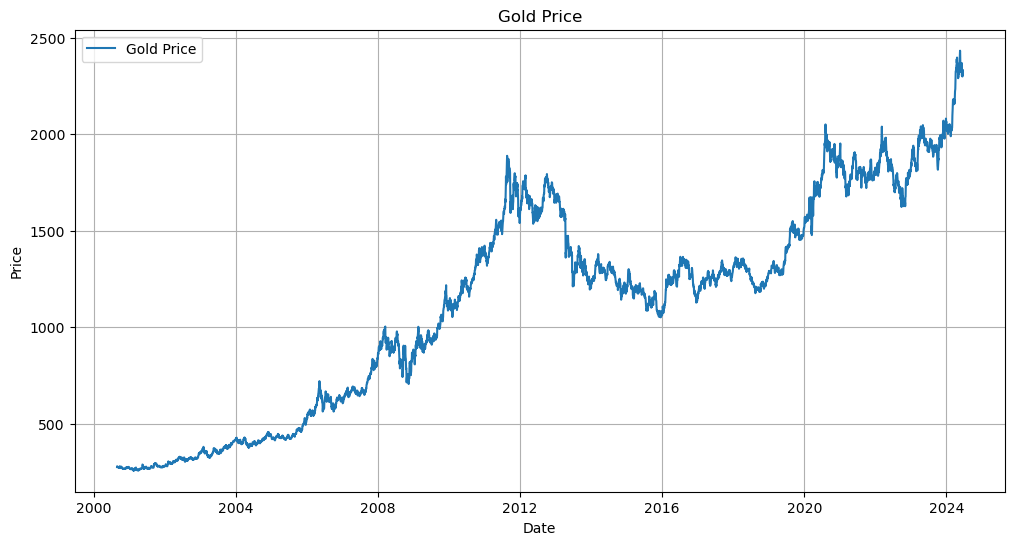

In [16]:
# Plotting the 'Close' prices
plt.figure(figsize=(12, 6))
plt.plot(df['Date'],df['Close'], label='Gold Price')
plt.title('Gold Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

#Overall: The gold price is increasing over time.It start from around 200 when 2000 August.Nowsaday it increase even near 2500 dollars.
#It look like a best stock for investing because It already increase nearly 12.5 times of its price from 2000 August.
#It had two significant increasing trend which is 2008 to 2012 and 2020 to 2024
#For the increasing after 2008 most probably is because the end of the financial crisis.Then the development of economic grow rapidly.
#For increasing after 2020 because it had a pandemic called COVID-19 at the time.During pandemic, human should stay in their house 
#to avoid infect covid-19. Thus the economic of the period is weak.After end of the pandemic,the operation resumes then make the economic rapidly growing
#There is a stable period between the 2012 to 2020 means that the gold price has no significant volatility.
#Reason: Due to the financial crisis 2008,the central bank implement some policies to avoid the financial crisis happens again.
#However this make interest rate always at a lower place.Thus there is no a significant volatility during the time.

### Quarterly Plotting

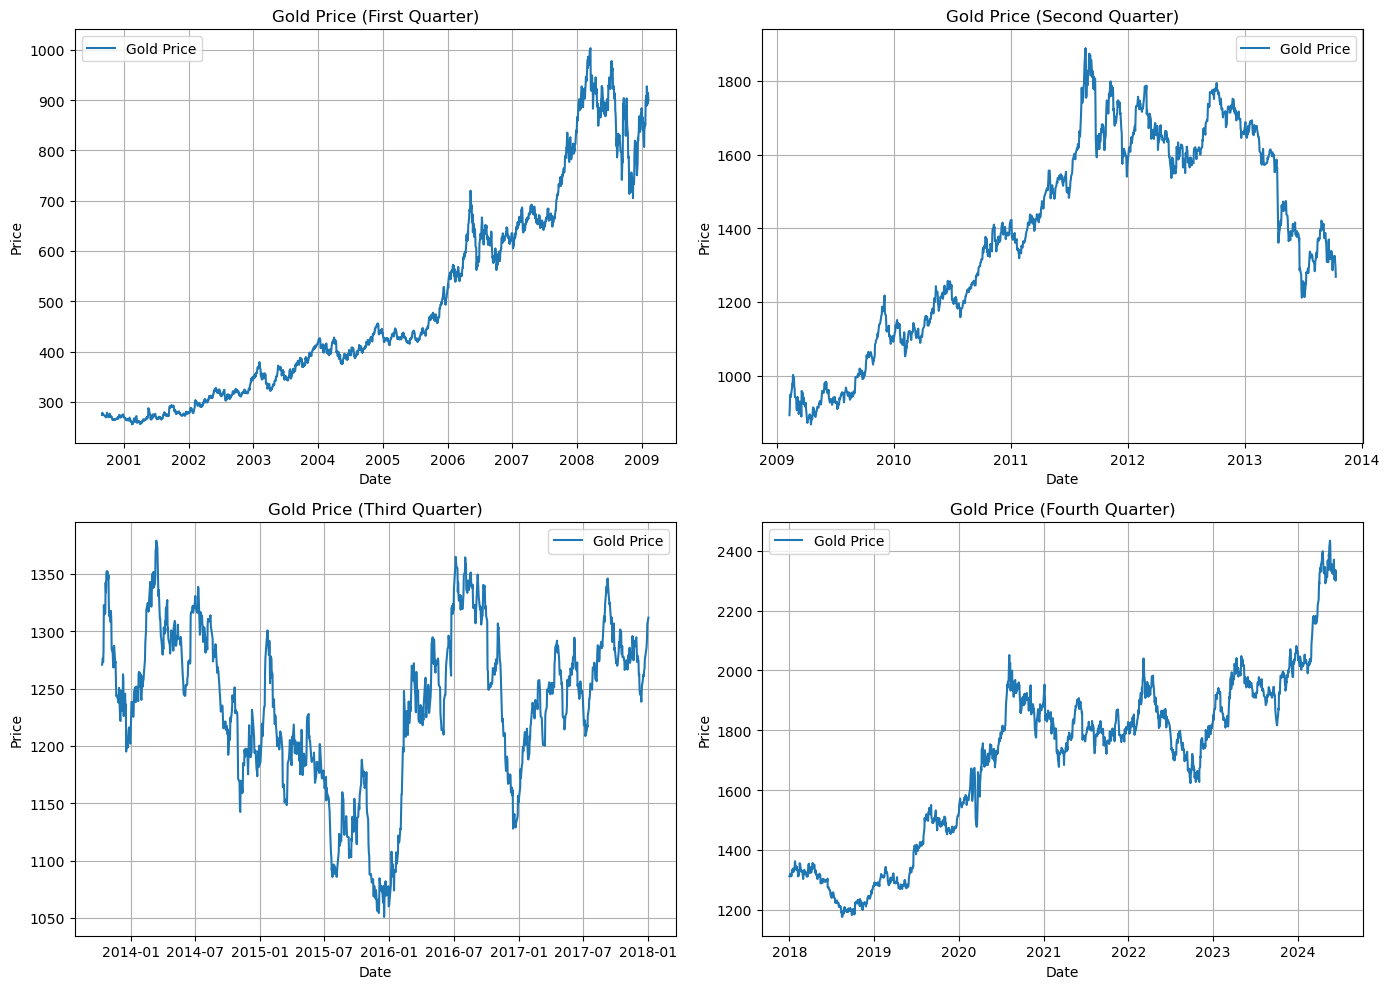

In [17]:
# Calculate the quarter points
quarter1 = len(df) // 4
quarter2 = len(df) // 2
quarter3 = 3 * len(df) // 4

# Split the dataset into four quarters
first_quarter = df[:quarter1]
second_quarter = df[quarter1:quarter2]
third_quarter = df[quarter2:quarter3]
fourth_quarter = df[quarter3:]

# Plot the four quarters in a 2x2 grid layout

plt.figure(figsize=(14, 10))

# Plot the first quarter
plt.subplot(2, 2, 1)
plt.plot(first_quarter['Date'], first_quarter['Close'], label='Gold Price')
plt.title('Gold Price (First Quarter)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot the second quarter
plt.subplot(2, 2, 2)
plt.plot(second_quarter['Date'], second_quarter['Close'], label='Gold Price')
plt.title('Gold Price (Second Quarter)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot the third quarter
plt.subplot(2, 2, 3)
plt.plot(third_quarter['Date'], third_quarter['Close'], label='Gold Price')
plt.title('Gold Price (Third Quarter)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot the fourth quarter
plt.subplot(2, 2, 4)
plt.plot(fourth_quarter['Date'], fourth_quarter['Close'], label='Gold Price')
plt.title('Gold Price (Fourth Quarter)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Box Plot

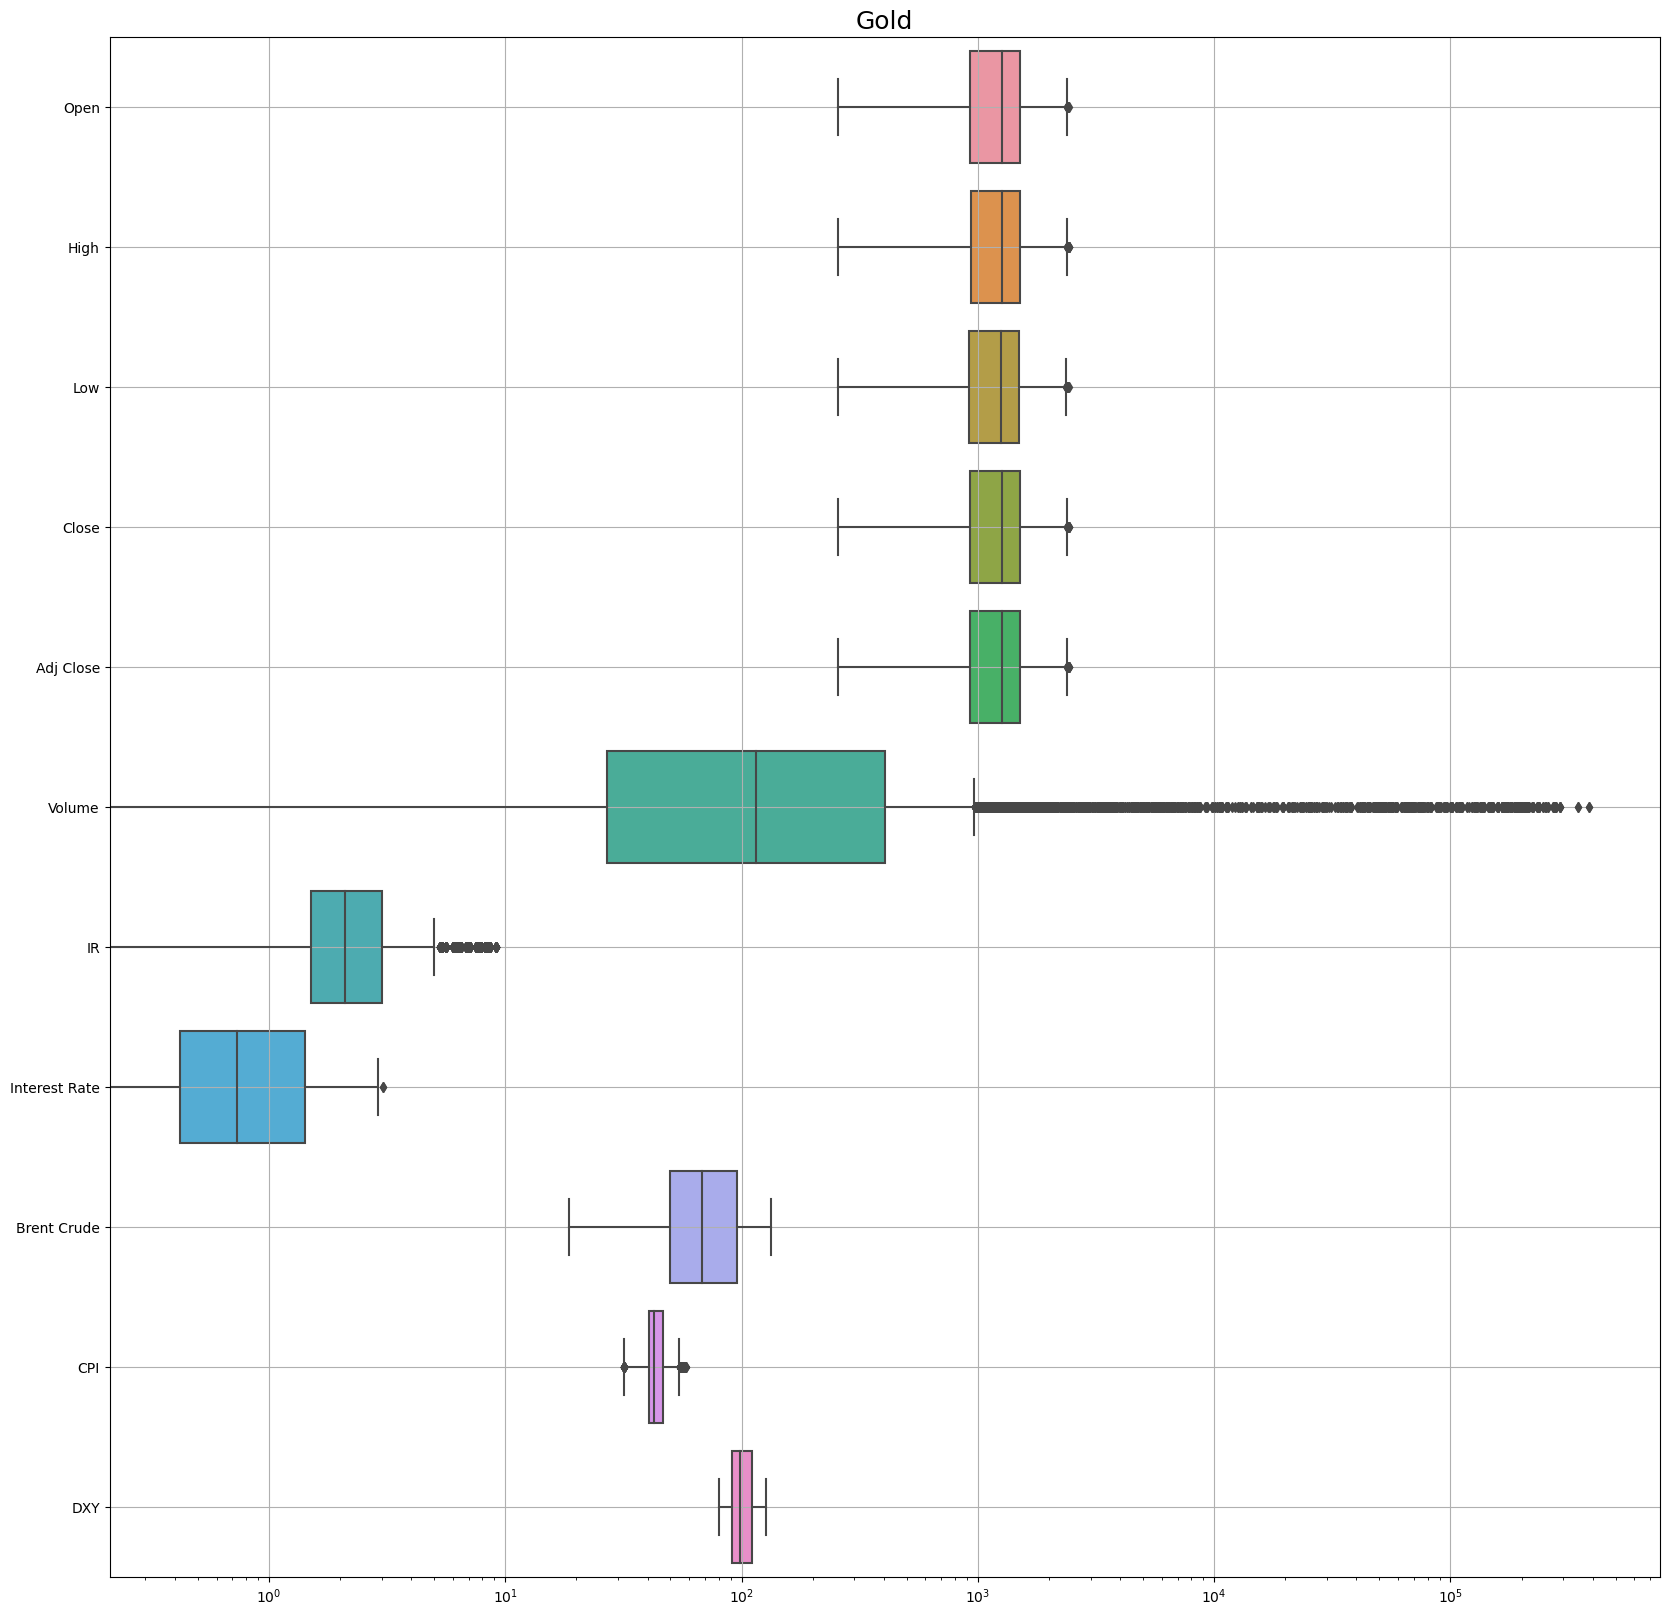

In [18]:
# Plotting Boxplots 
plt.figure(figsize = (20,20))
ax =sns.boxplot(df, orient="h")
ax.set_title('Gold', fontsize = 18)
ax.set(xscale="log")
plt.grid()
plt.show()
#Open,High,Low,Close,Adj Close,Interest Rate,CPI had detected few of outliers
#Inflation had a larger outliers
#Volume had the largest numbers of outliers

### Scatter Plot

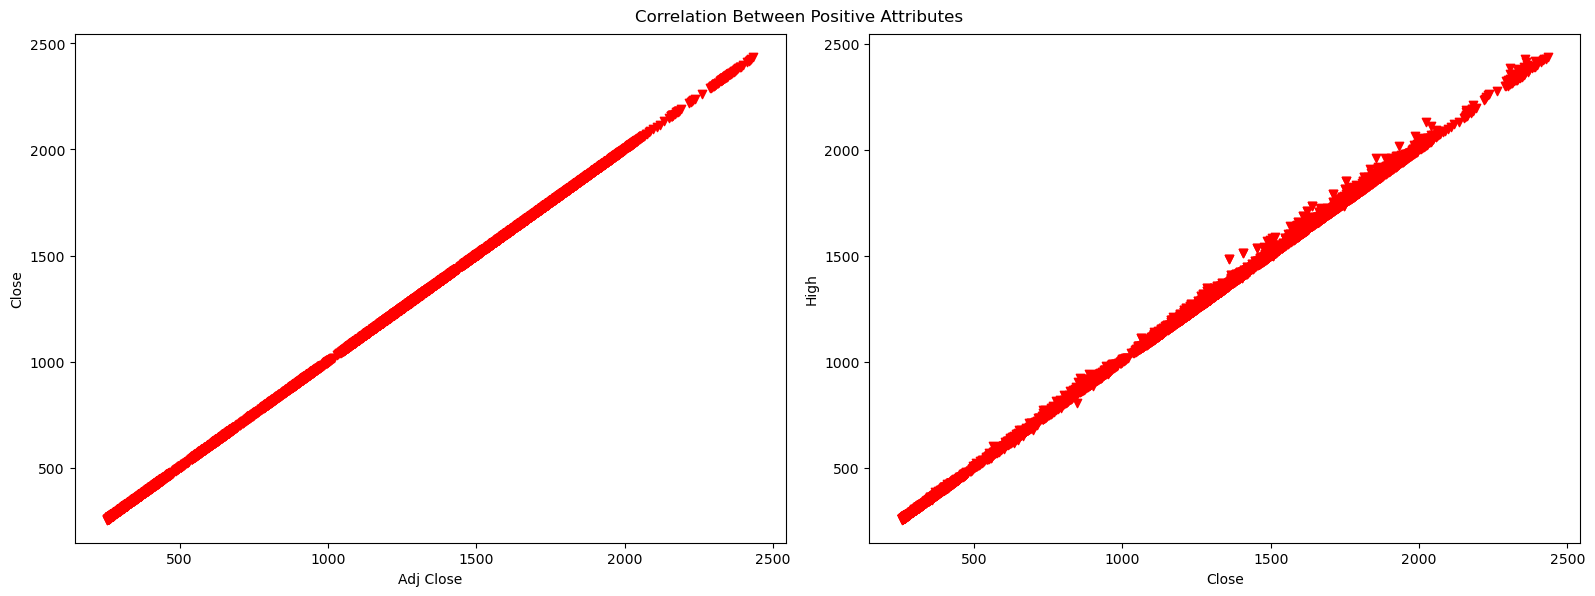

In [22]:
# Correlation between positive variables
#If both variable correlation is positive they will be a increasing trend in scatter plot
plt.figure(figsize=(16,6))

plt.suptitle("Correlation Between Positive Attributes")

plt.subplot(1,2,1)
plt.xlabel("Adj Close")
plt.ylabel("Close")
plt.scatter(df['Adj Close'], df['Close'], marker='v',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("Close")
plt.ylabel("High")
plt.scatter(df['Close'], df["High"], marker='v',color = 'red')

plt.tight_layout(pad=0.8)

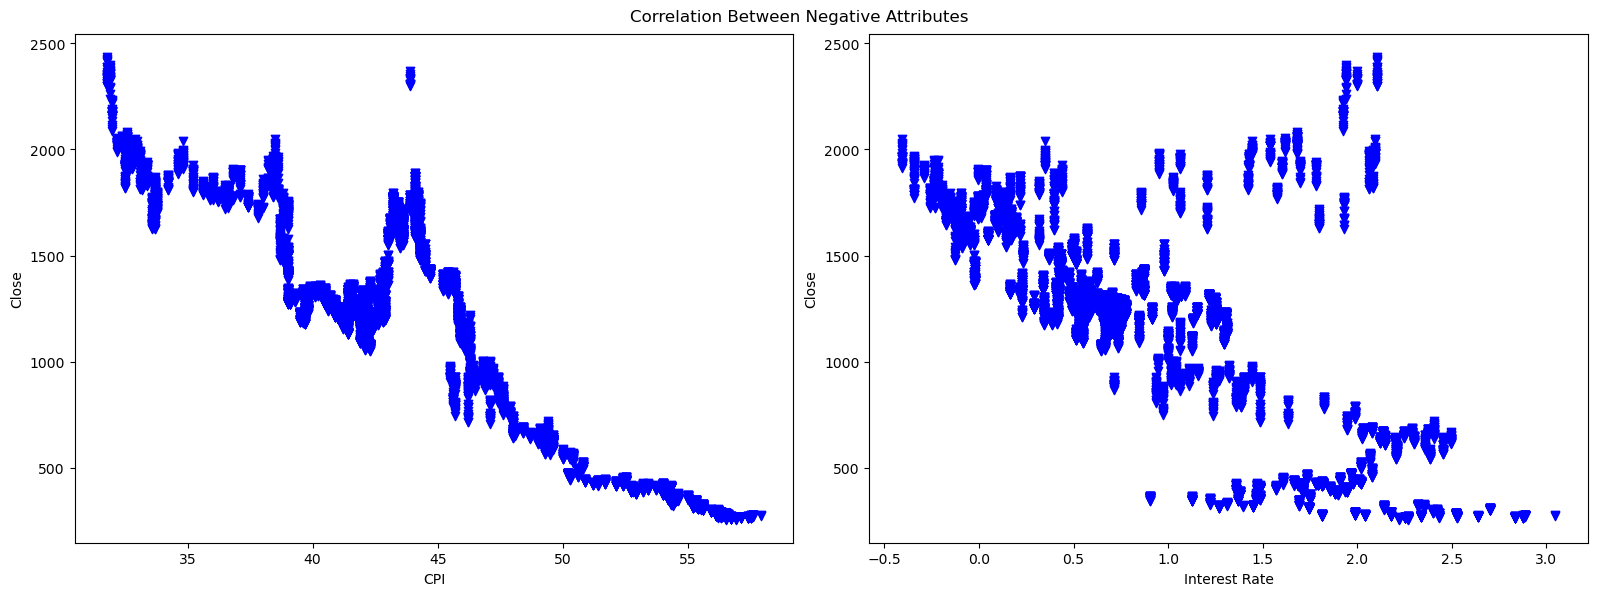

In [23]:
# Correlation between negative variables

plt.figure(figsize=(16,6))

plt.suptitle("Correlation Between Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("CPI")
plt.ylabel("Close")
plt.scatter(df['CPI'], df['Close'], marker='v',color = 'blue')

plt.subplot(1,2,2)
plt.xlabel("Interest Rate")
plt.ylabel("Close")
plt.scatter(df['Interest Rate'], df["Close"], marker='v',color = 'blue')

plt.tight_layout(pad=0.8)
#If both variable correlation is negative they will be one variable is increasing when another is decreasing
#Plot1:when the close at the highest place the CPI was at the lowest place,when CPI at the highest place the gold price was at the lowest place


### Heatmap

C:\Users\PC\AppData\Local\Temp\ipykernel_10568\1105953112.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


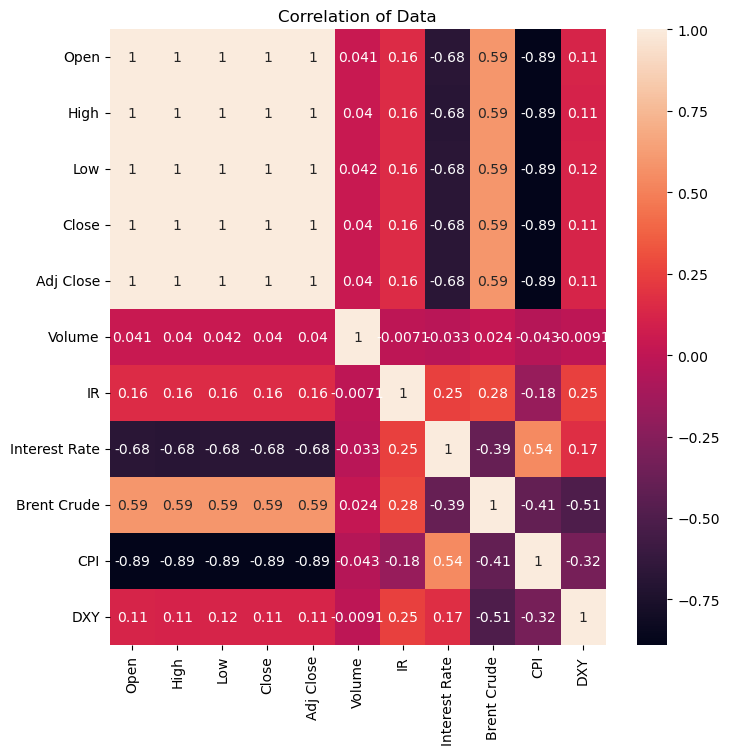

In [19]:
#Heatmap for observe correlation of the data
corr = df.corr()
plt.figure(figsize= (8,8))
plt.title("Correlation of Data")
sns.heatmap(corr,annot = True)


plt.show()

In [20]:
# Obtain the Top 4 positive and negative correlation 
pos_corr = df.corrwith(df['Close']).sort_values(ascending=False)[:4].index.tolist()
neg_corr = df.corrwith(df['Close']).sort_values()[:4].index.tolist()

positive_corr = df[pos_corr + ["Close"]].copy()
negative_corr = df[neg_corr + ["Close"]].copy()
print("Top 4 positive correlation with Close variables:", pos_corr)
print("\nTop 4 negative correlation with Close variables:", neg_corr)

#The top positive correlation with target variable(Close) is Close,Adj Close,Low and High.The close definetely is the highest
#Because it should correlate with itself,The others are the common variable of close price.Thus they are the top 4 of positive correlation
#The top4 negative correlation with close is CPI,Interest Rat,Volume and DXY
#These variables except the volume are economic index.They had negative correlation to close indicate that when the gold price increase
#They will decrease at the same time

Top 4 positive correlation with Close variables: ['Close', 'Adj Close', 'Low', 'High']

Top 4 negative correlation with Close variables: ['CPI', 'Interest Rate', 'Volume', 'DXY']


C:\Users\PC\AppData\Local\Temp\ipykernel_10568\3956574595.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pos_corr = df.corrwith(df['Close']).sort_values(ascending=False)[:4].index.tolist()
C:\Users\PC\AppData\Local\Temp\ipykernel_10568\3956574595.py:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  neg_corr = df.corrwith(df['Close']).sort_values()[:4].index.tolist()


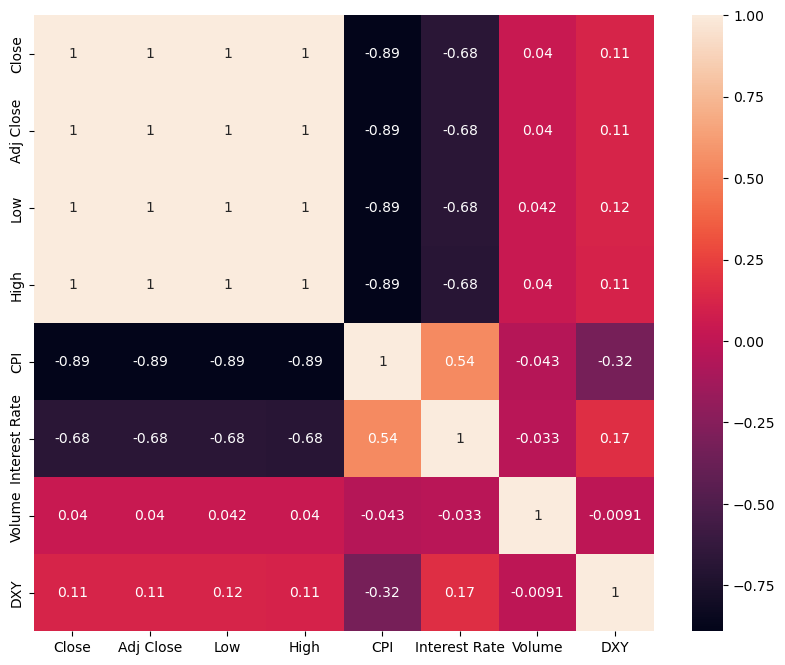

In [21]:
# Heatmap 
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(10,8))
sns.heatmap(df[relation].corr(),annot=True)

plt.show()

# Inferential Testing

### t-test

In [24]:
# Perform t-tests between 'Close' and all other variables
variables = df.select_dtypes(include=[np.number]).columns

target_column = 'Close'
t_test = {}

for col in variables:
    if col != target_column:
        t_stat, p_value = stats.ttest_ind(df[target_column], df[col])#perform t-test
        t_test[col] = (t_stat, p_value)

t_test_df = pd.DataFrame(t_test, index=['t_statistic', 'p_value']).T

t_test_df
#t-test: size of the difference relative to the variation(higher absolute value indicate higher difference)
#p-value: p<0.05(reject H0),p>0.05(fail to reject H0)
#H0: no significant differences
#H1: significant differences
#The Adj Close had the highest p-value indicates that it is no significant difference from close price
#The p-value of open,high,low are also greater than 0.05 mean they are no significant differences from close price
#Furthermore the t-stat of them are very low this support that they are no significant differences from close price

,t_statistic,p_value
Open,-0.015292,9.877996e-01
High,-0.977839,3.281638e-01
Low,1.014996,3.101179e-01
Adj Close,0.000000,1.000000e+00
Volume,-15.099393,2.770668e-51
IR,275.349363,0.000000e+00
Interest Rate,275.671655,0.000000e+00
Brent Crude,258.914048,0.000000e+00
CPI,265.708197,0.000000e+00
DXY,252.582433,0.000000e+00


In [25]:
# Find the variables which reject H0
significant_results = t_test_df[t_test_df['p_value'] < 0.05]

significant_results

#Inflation Rate(IR) and Interest Rate had the highest difference from Close
#The results show that a total of 6 important attributes which getting p-value < 0.05 in t-test. 
#For these attributes,we have evidence to reject the null hypotheses of the two classes having equal population means.

,t_statistic,p_value
Volume,-15.099393,2.770668e-51
IR,275.349363,0.000000e+00
Interest Rate,275.671655,0.000000e+00
Brent Crude,258.914048,0.000000e+00
CPI,265.708197,0.000000e+00
DXY,252.582433,0.000000e+00


# Factor Analysis
### Exploratory Factor Analysis

In [26]:
#Normalization for Factor Analysis
# Normalize the data using MinMaxScaler
data = df.drop(columns=['Date'])
scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)
data = pd.DataFrame(data_norm,columns = data.columns)
data.head()
#As shown as the table,all the value become smaller around to 0 due to the normalization

,Open,High,Low,Close,Adj Close,Volume,IR,Interest Rate,Brent Crude,CPI,DXY
0,0.008692,0.008166,0.008726,0.008629,0.008629,0.000000,0.669643,1.000000,0.112683,1.000000,0.508477
1,0.009106,0.010185,0.009141,0.010648,0.010648,0.000000,0.669643,1.000000,0.112683,1.000000,0.508477
2,0.010117,0.009588,0.010157,0.010051,0.010051,0.000000,0.500000,0.953771,0.127751,0.988506,0.540163
3,0.009979,0.009451,0.010018,0.009914,0.009914,0.000001,0.500000,0.953771,0.127751,0.988506,0.540163
4,0.009841,0.009313,0.009880,0.009776,0.009776,0.000003,0.500000,0.953771,0.127751,0.988506,0.540163


In [27]:
column = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'IR','Interest Rate', 'Brent Crude', 'CPI', 'DXY'] #get the dependent variables
X = data[column]
X

,Open,High,Low,Adj Close,Volume,IR,Interest Rate,Brent Crude,CPI,DXY
0,0.008692,0.008166,0.008726,0.008629,0.000000,0.669643,1.000000,0.112683,1.000000,0.508477
1,0.009106,0.010185,0.009141,0.010648,0.000000,0.669643,1.000000,0.112683,1.000000,0.508477
2,0.010117,0.009588,0.010157,0.010051,0.000000,0.500000,0.953771,0.127751,0.988506,0.540163
3,0.009979,0.009451,0.010018,0.009914,0.000001,0.500000,0.953771,0.127751,0.988506,0.540163
4,0.009841,0.009313,0.009880,0.009776,0.000003,0.500000,0.953771,0.127751,0.988506,0.540163
...,...,...,...,...,...,...,...,...,...,...
12337,0.936123,0.941964,0.939751,0.942078,0.000696,0.482143,0.697035,0.528865,0.463920,0.919055
12338,0.940446,0.944167,0.944137,0.941986,0.002255,0.482143,0.697035,0.528865,0.463920,0.919055
12339,0.947298,0.955453,0.948892,0.955067,0.000342,0.482143,0.697035,0.528865,0.463920,0.919055
12340,0.944769,0.945818,0.942382,0.938636,0.000771,0.482143,0.697035,0.528865,0.463920,0.919055


In [28]:
from factor_analyzer import FactorAnalyzer,calculate_bartlett_sphericity,calculate_kmo
# Calculate the Kaiser-Meyer-Olkin (KMO) test of sampling adequacy
kmo_all, kmo_model = calculate_kmo(X)
print('KMO Model Score:', kmo_model)

# KMO statistic varies between 0 and 1, with higher values indicating more suitability for factor analysis:
# KMO < 0.5: Indicates the data is not suitable for factor analysis.
# 0.5 ≤ KMO < 0.6: Marginal adequacy.
# 0.6 ≤ KMO < 0.7: Adequate.
# 0.7 ≤ KMO < 0.8: Good.
# 0.8 ≤ KMO < 0.9: Great.
# KMO ≥ 0.9: Superb.

#Result = 0.75 suggests that the dataset is good for factor analysis.  
#It indicates that the dataset has sufficient patterns or relationships among variables that can be explored using factor analysis techniques.

KMO Model Score: 0.7457549962790384


C:\Users\PC\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


In [29]:
# Perform grid search for factor analysis (rotation type, methods, use_smc)
rotation_methods = ['varimax', 'oblimin', 'equamax', None]
methods = ['ml', 'mle', 'uls', 'minres', 'principal']
use_smc_options = [True, False]

n_factors = X.shape[1] # number of factors (10)

results_df = pd.DataFrame(columns = ['N_factors', 'Rotation', 'Method','Use SMC', 'Variance Explained'])  # initialize an empty dataframe to store the results

# Grid Search
for rotation in rotation_methods:
    for method in methods:
        for use_smc in use_smc_options:
            
            print(f"Fitting on parameter rotation = {rotation}, method = {method}, use_smc = {use_smc}")
            
            # Initialize factor analyzer with current hyperparameters
            fa = FactorAnalyzer(n_factors = n_factors, rotation = rotation, method = method, use_smc = use_smc)
            
            # Fit factor analyzer with correlation matrix
            fa.fit(X)
            
            # Calculate variance explained
            avg_variance_explained = np.mean(fa.get_factor_variance())

            # Store results in dataframe
            result = pd.DataFrame([{
                'N_factors': n_factors,
                'Rotation': rotation,
                'Method': method,
                'Use SMC': use_smc,
                'Variance Explained': avg_variance_explained,
            }])
            results_df = pd.concat([results_df, result], ignore_index = True)

C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In

Fitting on parameter rotation = varimax, method = ml, use_smc = True
Fitting on parameter rotation = varimax, method = ml, use_smc = False
Fitting on parameter rotation = varimax, method = mle, use_smc = True
Fitting on parameter rotation = varimax, method = mle, use_smc = False
Fitting on parameter rotation = varimax, method = uls, use_smc = True
Fitting on parameter rotation = varimax, method = uls, use_smc = False
Fitting on parameter rotation = varimax, method = minres, use_smc = True
Fitting on parameter rotation = varimax, method = minres, use_smc = False
Fitting on parameter rotation = varimax, method = principal, use_smc = True
Fitting on parameter rotation = varimax, method = principal, use_smc = False


C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)


Fitting on parameter rotation = oblimin, method = ml, use_smc = True
Fitting on parameter rotation = oblimin, method = ml, use_smc = False
Fitting on parameter rotation = oblimin, method = mle, use_smc = True


C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)


Fitting on parameter rotation = oblimin, method = mle, use_smc = False
Fitting on parameter rotation = oblimin, method = uls, use_smc = True


C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)


Fitting on parameter rotation = oblimin, method = uls, use_smc = False
Fitting on parameter rotation = oblimin, method = minres, use_smc = True


C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)


Fitting on parameter rotation = oblimin, method = minres, use_smc = False
Fitting on parameter rotation = oblimin, method = principal, use_smc = True


C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)


Fitting on parameter rotation = oblimin, method = principal, use_smc = False


C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In

Fitting on parameter rotation = equamax, method = ml, use_smc = True
Fitting on parameter rotation = equamax, method = ml, use_smc = False
Fitting on parameter rotation = equamax, method = mle, use_smc = True
Fitting on parameter rotation = equamax, method = mle, use_smc = False
Fitting on parameter rotation = equamax, method = uls, use_smc = True
Fitting on parameter rotation = equamax, method = uls, use_smc = False
Fitting on parameter rotation = equamax, method = minres, use_smc = True
Fitting on parameter rotation = equamax, method = minres, use_smc = False


C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)


Fitting on parameter rotation = equamax, method = principal, use_smc = True
Fitting on parameter rotation = equamax, method = principal, use_smc = False


C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)
C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In

Fitting on parameter rotation = None, method = ml, use_smc = True
Fitting on parameter rotation = None, method = ml, use_smc = False
Fitting on parameter rotation = None, method = mle, use_smc = True
Fitting on parameter rotation = None, method = mle, use_smc = False
Fitting on parameter rotation = None, method = uls, use_smc = True
Fitting on parameter rotation = None, method = uls, use_smc = False
Fitting on parameter rotation = None, method = minres, use_smc = True
Fitting on parameter rotation = None, method = minres, use_smc = False
Fitting on parameter rotation = None, method = principal, use_smc = True
Fitting on parameter rotation = None, method = principal, use_smc = False


C:\Users\PC\AppData\Local\Temp\ipykernel_10568\2501392345.py:34: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  results_df = pd.concat([results_df, result], ignore_index = True)


In [30]:
# Show the variance explained of each hyperparameter combination in non-ascending order
results_sorted_df = results_df.sort_values('Variance Explained', ascending = False)
results_sorted_df.reset_index(drop=True)

,N_factors,Rotation,Method,Use SMC,Variance Explained
0,10,None,principal,False,0.668630
1,10,None,principal,True,0.668630
2,10,equamax,principal,True,0.666339
3,10,equamax,principal,False,0.666339
4,10,varimax,principal,True,0.661175
5,10,varimax,principal,False,0.661175
6,10,oblimin,principal,False,0.629850
7,10,oblimin,principal,True,0.629850
8,10,None,uls,False,0.594575
9,10,None,minres,False,0.594575


In [31]:
# Perform factor analysis using the best parameter obtained above
fa = FactorAnalyzer(n_factors, rotation = None, method = 'principal')
fa.fit(X)

FactorAnalyzer(method='principal', n_factors=10, rotation=None,
               rotation_kwargs={})

In [32]:
# Kaiser-Guttman rule
eigenvalues, v = fa.get_eigenvalues()
idx = np.where(eigenvalues > 1)[0]
n_factors_kg = idx.size
print(f"Number of factors (Kaisei-Guttman rule): {n_factors_kg}")
#The results show us the number of factors is 3.Mean there might be 3 category of data

Number of factors (Kaisei-Guttman rule): 3


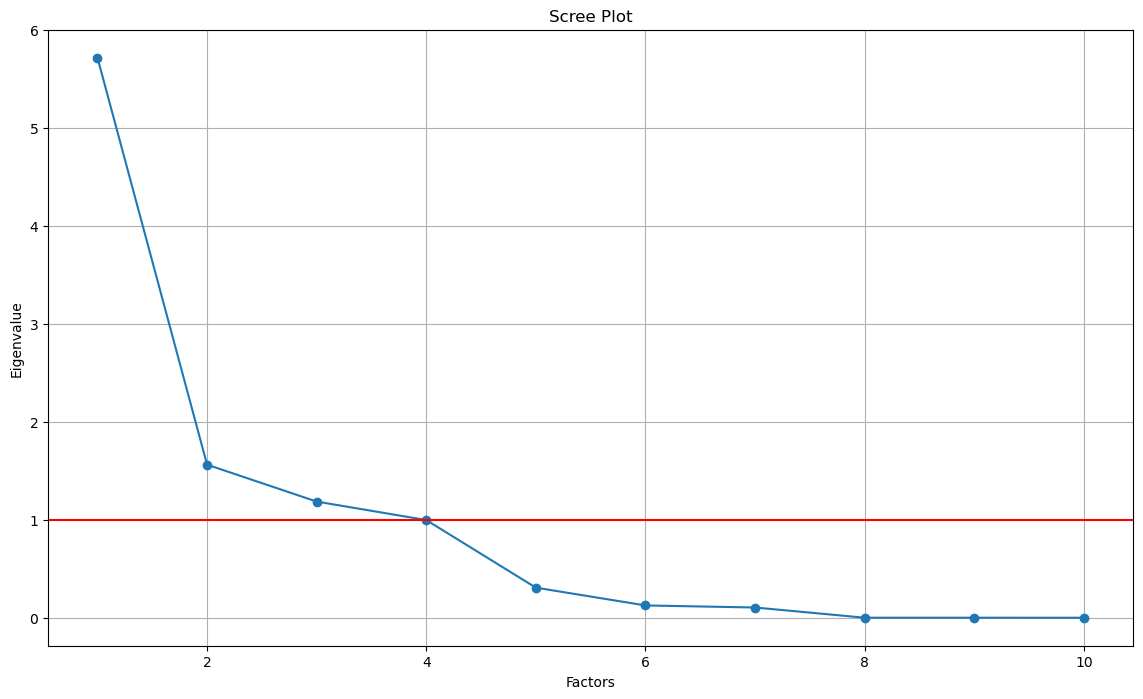

In [33]:
# Visualize using Scree Plot
plt.figure(figsize = (14,8))
plt.plot(range(1, n_factors+1), eigenvalues, marker = 'o')
plt.axhline(y = 1.0, color = 'r', linestyle = '-') # plot a horizontal line at y=1.0 to separate those eigenvalues > 1
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()

#There was 3 factors larger than 1 indicates that the number of factors is 3.
#Although there is a factor = 1 at factor 4.But it still didn't larger than 1 means that can't be a category

In [38]:
fa = FactorAnalyzer(n_factors_kg, rotation = None, method = 'principal')
fa.fit(X)

FactorAnalyzer(method='principal', rotation=None, rotation_kwargs={})

In [39]:
# Get the factor loadings
loadings = fa.loadings_
print("Shape of factor loadings matrix", loadings.shape)
print(loadings)
#As the result show us how the factor analyzer categorize the data
#The factor 1 included the variable1,2,3,4,5 which are 'Open', 'High', 'Low', 'Adj Close' and ‘Brent Crude’
#The factor 2 included Volume’ and ‘DXY’
#The factor 3 included IR’,’Interest Rate’ and ‘CPI’.
#The factor 1 is the price-related factor of the gold price because they had high correlative with close
#For Brent Crude,it also a stock price and had an important place in the economic of the world because it decided the cost of the transportation
#The factor 2 could be the trading factor.Volume is the number trading of the day and most of investor and platform use dollars to progress investing.
#Thus the DXY and Volume are in a same category
#The factor 3 might be the economic index.All of them use percentage as unit.They can direct influnce the trending of price of any stocks or things
#Example the policies and quantitative easing programs make the interest rate in a lower place during the period of after financial crisis
#The gold price during that period is stable and low compare to the price before 2018

Shape of factor loadings matrix (10, 3)
[[ 0.99325231  0.0442166  -0.0275823 ]
 [ 0.99319023  0.04309491 -0.02778121]
 [ 0.99321992  0.04639112 -0.02751526]
 [ 0.99318502  0.04447712 -0.02780045]
 [ 0.05044365 -0.02936561 -0.06148632]
 [ 0.16938757  0.4761101   0.81605371]
 [-0.72095454  0.35913181  0.38085592]
 [ 0.63753926 -0.48154196  0.5460242 ]
 [-0.89924785 -0.26980081  0.09015443]
 [ 0.07105773  0.94522751 -0.24854058]]


In [40]:
# Determine the primary factor for each variable based on factor loadings

# Set the threshold for meaningful loadings
threshold = 0.6

# Create an array to store the primary factor for each variable
primary_factor = np.zeros(X.shape[1])

# Loop through each variable and determine its primary factor
for i in range(X.shape[1]):
    
    # Get the factor loadings for the current variable
    current_loadings = loadings[i, :]
    
    # Find the factors with the highest and second-highest loadings
    top_two_factors = np.argsort(-current_loadings)[:2]
    
    # If the highest loading is above the threshold and at least twice as large
    # as the second-highest loading, assign the variable to the primary factor
    if current_loadings[top_two_factors[0]] > threshold and current_loadings[top_two_factors[0]] >= 2 * current_loadings[top_two_factors[1]]:
        primary_factor[i] = top_two_factors[0] + 1

for i in range(X.shape[1]):
    print(f"Variable {i+1}: Primary factor = {int(primary_factor[i])}")

Variable 1: Primary factor = 1
Variable 2: Primary factor = 1
Variable 3: Primary factor = 1
Variable 4: Primary factor = 1
Variable 5: Primary factor = 0
Variable 6: Primary factor = 0
Variable 7: Primary factor = 0
Variable 8: Primary factor = 0
Variable 9: Primary factor = 0
Variable 10: Primary factor = 2


In [41]:
# Investigate the factor loadings of the variables in each factor that has variables belong to them

# Create DataFrame to store the factor loadings
factor_loadings_df = pd.DataFrame(columns=["Factor", "Variable", "Factor Loadings"])

# Loop through each factor
for i in range(n_factors_kg):
    factor_variables = np.where(primary_factor == i + 1)[0]
    factor_loadings = loadings[factor_variables, i]
    
    # Loop through each variable in the factor and store it as a separate row
    for j in range(len(factor_variables)):
        variable = factor_variables[j] + 1
        factor_loadings_df = pd.concat([factor_loadings_df, pd.DataFrame({
            "Factor": [i + 1],
            "Variable": [variable],
            "Factor Loadings": [factor_loadings[j]]
        })], ignore_index=True)
        
factor_loadings_df

# We extract significant factors with loadings larger than 0.6 (threshold).
# This technique can be used to reduce the dimensionality of the data.
# After extraction, the table shows that variables 1, 2, 3, 4, and 10 are the latent variables or factors.
#If using regression model,these variales could be the dependent variable for gold price

,Factor,Variable,Factor Loadings
0,1,1,0.993252
1,1,2,0.993190
2,1,3,0.993220
3,1,4,0.993185
4,2,10,0.945228


# Conclusion
After exploring the data,we can know that the open,high,low,adj close are always had a high correlative to close price.
However the economic index are the most difference from close price due to the results given by correlation matrix and t-test
In this project we implement some time series model to forecast the gold price
Thus,we can make an assumption,the DXY might can be the exogenoues data for arimax and sarimax.Because it is highly difference from target variable and had a significant category in factor analysis.
